In [62]:
import pandas as pd # Manipulación de datos
import numpy as np # Cálculos numéricos 
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos avanzados

In [63]:
# Cargar datos desde archivos Excel o mis datos
df_2020 = pd.read_excel('2020-2021.xlsx')   # Datos de 2020-2021
df_2023 = pd.read_excel('2023-2024.xlsx') #     Datos de 2023-2024


In [64]:
# Hacer mayúsculas los nombres de carreras
df_2020['Carrera'] = df_2020['Carrera'].str.upper().str.strip() # Normalizar nombres
df_2023['Carrera'] = df_2023['Carrera'].str.upper().str.strip() # Normalizar nombres


In [65]:
# Juntar datos por carrera y modalidad
df_junto = pd.merge( # Unir DataFrames
    df_2020[['Carrera', 'Modalidad', 'Nuevo Ingreso Total']], # Datos de 2020-2021
    df_2023[['Carrera', 'Modalidad', 'Egresados Total']], # Datos de 2023-2024
    on=['Carrera', 'Modalidad'] # Claves de unión
)   


In [66]:
df_junto['Tasa de Deserción'] = ((df_junto['Nuevo Ingreso Total'] - df_junto['Egresados Total']) # Calcular tasa de deserción
                                  / df_junto['Nuevo Ingreso Total'] * 100).round(3) # Expresada en porcentaje

In [67]:
# Programas válidos (tasa < 100% y ingresos > 0)
df_validos = df_junto[ # Filtrar programas válidos
    (df_junto['Nuevo Ingreso Total'] > 0) &  # Evitar división por cero
    (df_junto['Tasa de Deserción'] < 100) # Evitar tasas inválidas
].sort_values('Tasa de Deserción') # Ordenar por tasa de deserción

In [68]:
# Programas con 100% deserción
df_100 = df_junto[ # Filtrar programas con 100% deserción
    (df_junto['Nuevo Ingreso Total'] > 0) &  # Evitar división por cero
    (df_junto['Tasa de Deserción'] == 100) # Tasa exactamente 100%
].sort_values('Nuevo Ingreso Total', ascending=False) # Ordenar por ingresos

In [69]:
# Mostrar programas deserción


print("-------TASAS DE DESERCIÓN --------") # Títulos
for _, row in df_validos.iterrows(): # Iterar filas
    print(f"{row['Carrera']} ({row['Modalidad']}): {row['Tasa de Deserción']}% " # Mostrar datos
          f"(Ingresos: {row['Nuevo Ingreso Total']}, Egresados: {row['Egresados Total']})") # Formatear salida

-------TASAS DE DESERCIÓN --------
LICENCIATURA EN CIENCIAS DE LA COMUNICACIÓN (PH): 16.86% (Ingresos: 344, Egresados: 286)
LICENCIATURA EN RELACIONES INTERNACIONALES (PH): 44.981% (Ingresos: 518, Egresados: 285)
LICENCIATURA EN DERECHO Y CRIMINOLOGÍA (PH): 49.202% (Ingresos: 1065, Egresados: 541)
LICENCIATURA EN CIENCIAS DE DATOS (PH): 59.836% (Ingresos: 122, Egresados: 49)
LICENCIATURA EN URBANISMO Y DESARROLLO METROPOLITANO (PH): 75.385% (Ingresos: 65, Egresados: 16)
LICENCIATURA EN TECNOLOGÍAS DE INFORMACIÓN Y COMUNICACIÓN (EN LINEA): 93.943% (Ingresos: 842, Egresados: 51)
LICENCIATURA EN ADMINISTRACIÓN Y COMERCIO (EN LINEA): 95.326% (Ingresos: 920, Egresados: 43)
LICENCIATURA EN MERCADOTECNIA Y VENTAS (EN LINEA): 96.636% (Ingresos: 862, Egresados: 29)


In [70]:
# Mostrar programas con 100% deserción = Carreras nuevas sin egresados

print("\n------- Carreras nuevas con 100% de deserción ------") # Título
for _, row in df_100.iterrows(): # Iterar filas
    print(f"{row['Carrera']} ({row['Modalidad']}): 100% " # Mostrar datos
          f"(Ingresos: {row['Nuevo Ingreso Total']}, Egresados: {row['Egresados Total']})") # Formatear salida


------- Carreras nuevas con 100% de deserción ------
LICENCIATURA EN HUMANIDADES Y NARRATIVAS MULTIMEDIA (PH): 100% (Ingresos: 108, Egresados: 0)
LICENCIATURA EN HUMANIDADES Y NARRATIVAS MULTIMEDIA (EN LINEA): 100% (Ingresos: 82, Egresados: 0)


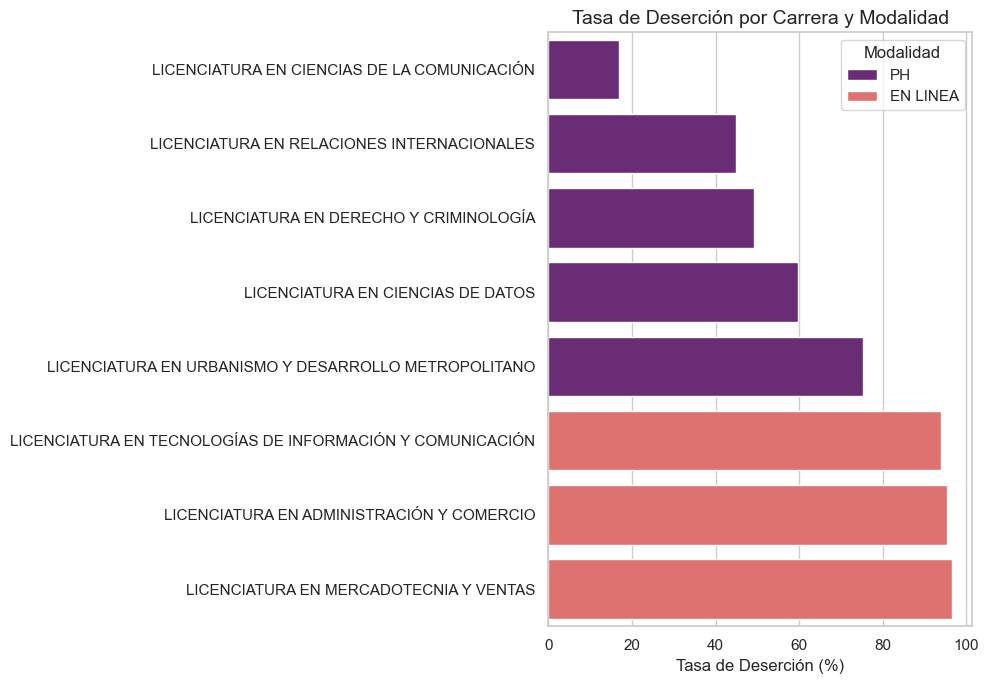

In [71]:
# Graficas

sns.set_style("whitegrid") # Estilo de fondo
sns.set_palette("rocket") # Paleta de colores
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12}) # Tamaño de fuente


plt.figure(figsize=(10, 7)) # Tamaño de la figura
sns.barplot( # Gráfico de barras
    data=df_validos.sort_values('Tasa de Deserción', ascending=True), # Datos ordenados
    y='Carrera', x='Tasa de Deserción', hue='Modalidad', # Dividir por modalidad
    palette='magma' # Paleta de colores
)
plt.title('Tasa de Deserción por Carrera y Modalidad', fontsize=14) # Título del gráfico
plt.xlabel('Tasa de Deserción (%)') # Etiqueta del eje x
plt.ylabel('') # Etiqueta del eje y vacía
plt.legend(title='Modalidad') # Leyenda
plt.tight_layout() # Ajuste de diseño
plt.show() # Mostrar gráfico

C:\Users\Almicar\AppData\Local\Temp\ipykernel_8048\2915261691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( # Gráfico de barras
C:\Users\Almicar\AppData\Local\Temp\ipykernel_8048\2915261691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( # Gráfico de barras


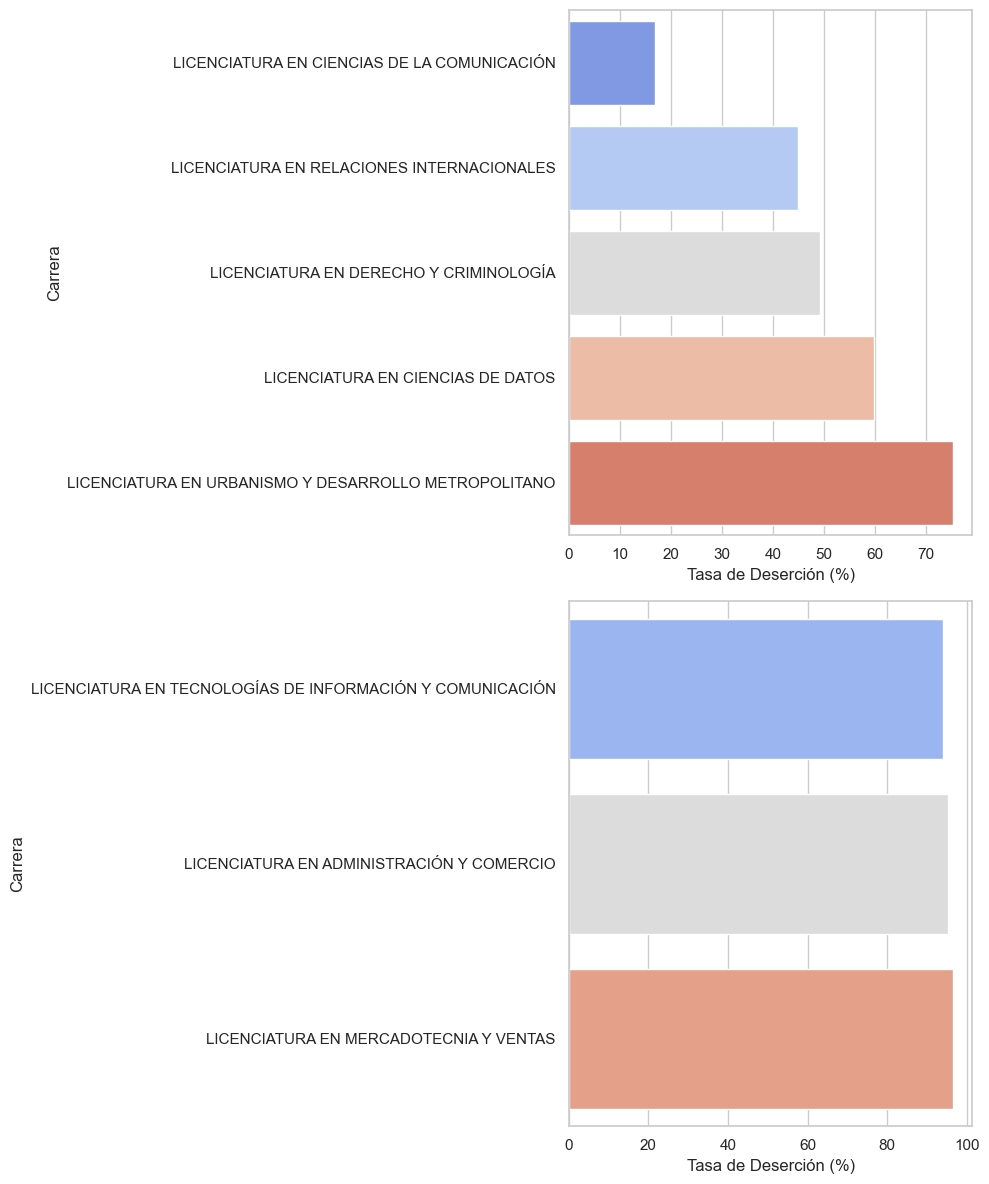

In [72]:
# Obtener modalidades

# Crear subplots dinámicos (uno por modalidad)
fig, axes = plt.subplots(len(modalidades), 1, figsize=(10, 6 * len(modalidades))) # Tamaño dinámico
 # Obtener modalidades únicas 
if len(modalidades) == 1: # Un solo subplot
    axes = [axes] # Convertir a lista para consistencia

# Graficar cada modalidad
for ax, modalidad in zip(axes, modalidades): # Iterar ejes y modalidades
    datos = df_validos[df_validos['Modalidad'] == modalidad] # Filtrar por modalidad
    sns.barplot( # Gráfico de barras
        data=datos, # Datos filtrados por modalidad
        y='Carrera', # Eje y
        x='Tasa de Deserción', # Eje x
        legend=False, 
        palette='coolwarm', # Paleta de colores
        ax=ax # Asignar eje
)
    ax.set_xlabel('Tasa de Deserción (%)') # Etiqueta del eje x
    ax.set_ylabel('Carrera')# Etiqueta del eje y
 
plt.tight_layout() # Ajuste de diseño
plt.show() # Mostrar gráfico

C:\Users\Almicar\AppData\Local\Temp\ipykernel_8048\4269679958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_validos, x='Modalidad', y='Tasa de Deserción', palette='coolwarm')


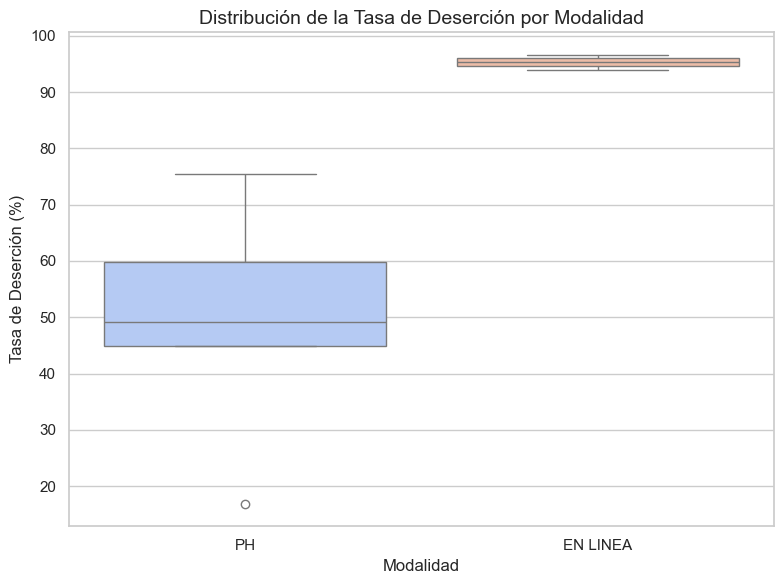

In [73]:
plt.figure(figsize=(8, 6)) #    
sns.boxplot(data=df_validos, x='Modalidad', y='Tasa de Deserción', palette='coolwarm')
plt.title('Distribución de la Tasa de Deserción por Modalidad', fontsize=14)
plt.ylabel('Tasa de Deserción (%)')
plt.xlabel('Modalidad')
plt.tight_layout() # 
plt.show() #

C:\Users\Almicar\AppData\Local\Temp\ipykernel_8048\1464683957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_validos, x='Modalidad', y='Tasa de Deserción', palette='Spectral') # Gráfico de violín


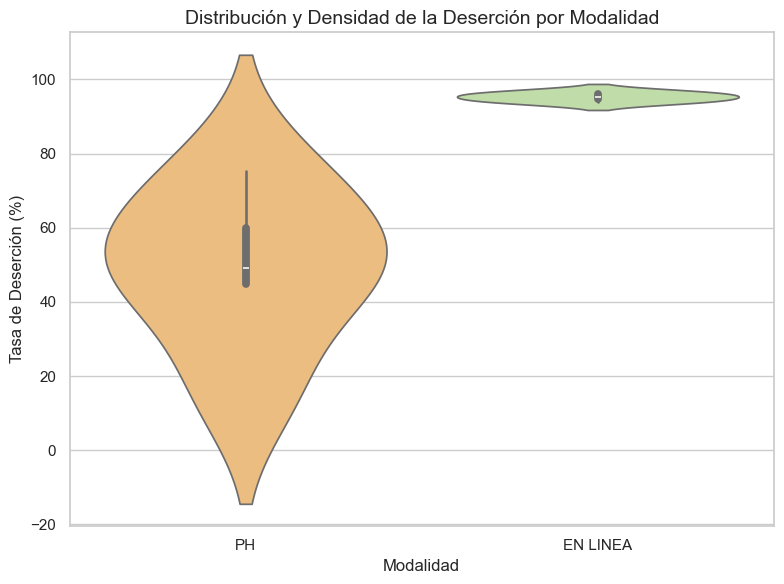

In [74]:
plt.figure(figsize=(8, 6)) # Tamaño de la figura
sns.violinplot(data=df_validos, x='Modalidad', y='Tasa de Deserción', palette='Spectral') # Gráfico de violín
plt.title('Distribución y Densidad de la Deserción por Modalidad', fontsize=14) # Título del gráfico
plt.ylabel('Tasa de Deserción (%)') # Etiqueta del eje y
plt.xlabel('Modalidad') # Etiqueta del eje x
plt.tight_layout() # Ajuste de diseño
plt.show() # Mostrar gráfico

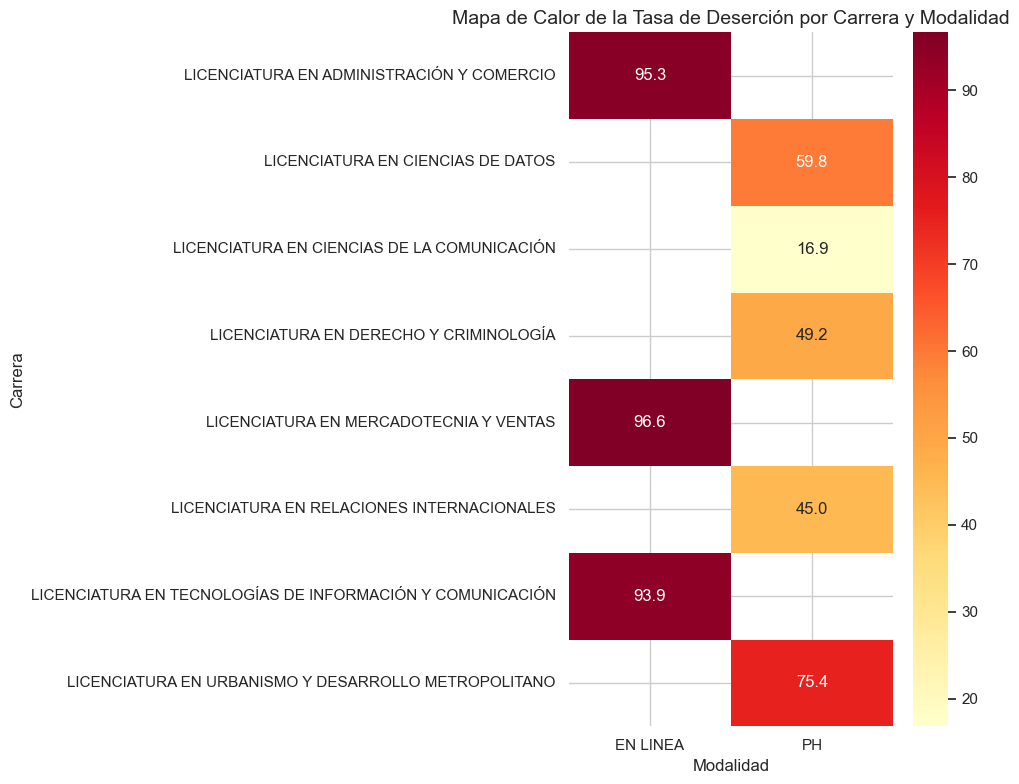

In [75]:
pivot = df_validos.pivot_table( 
    index='Carrera', columns='Modalidad', values='Tasa de Deserción' # Crear tabla pivote
)

plt.figure(figsize=(10, 8)) # Tamaño de la figura
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".1f") # Mapa de calor
plt.title('Mapa de Calor de la Tasa de Deserción por Carrera y Modalidad', fontsize=14) # Título del gráfico
plt.xlabel('Modalidad') # Etiqueta del eje x
plt.ylabel('Carrera') # Etiqueta del eje y
plt.tight_layout() # Ajuste de diseño
plt.show() # Mostrar gráfico

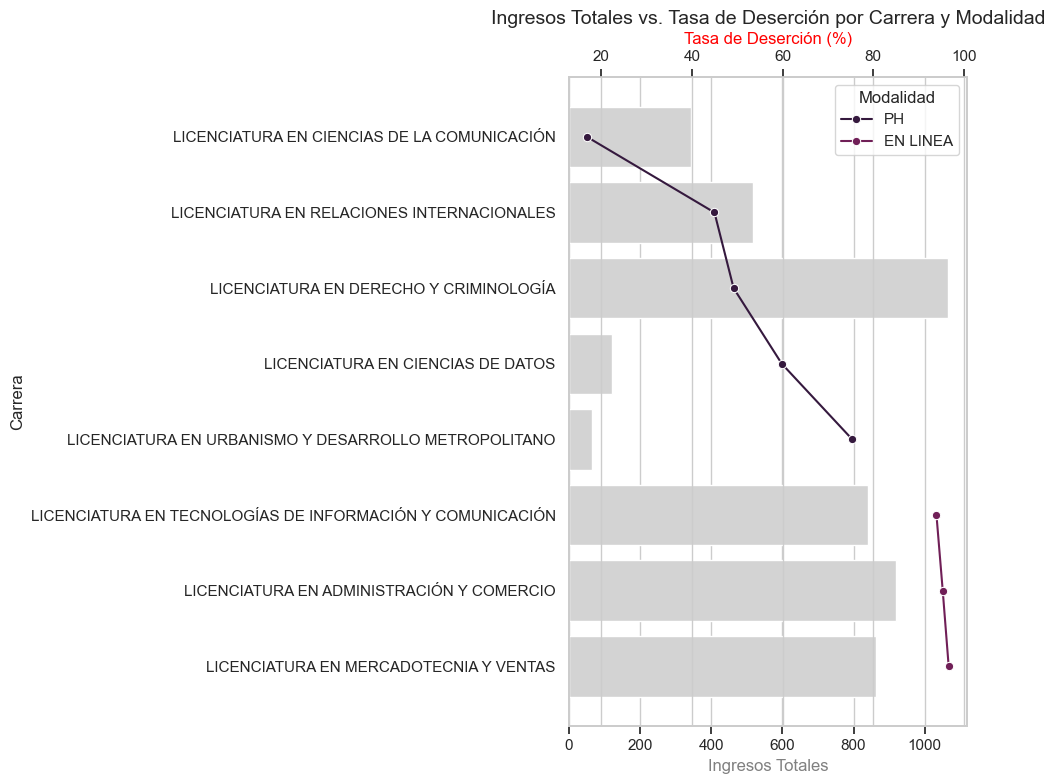

In [76]:
fig, ax1 = plt.subplots(figsize=(10, 8)) # Gráfico combinado

sns.barplot(data=df_validos, y='Carrera', x='Nuevo Ingreso Total', color='lightgray', ax=ax1) # Eje x primario
ax2 = ax1.twiny() # Eje x secundario
sns.lineplot(data=df_validos, y='Carrera', x='Tasa de Deserción', hue='Modalidad', marker='o', ax=ax2) # Eje x secundario
ax1.set_ylabel('Carrera')  # Etiqueta eje y
ax1.set_xlabel('Ingresos Totales', color='gray') # Etiqueta eje x primario
ax2.set_xlabel('Tasa de Deserción (%)', color='red') # Etiqueta eje x secundario
plt.title('Ingresos Totales vs. Tasa de Deserción por Carrera y Modalidad', fontsize=14) # Título
plt.tight_layout() # Ajuste de diseño
plt.show() # Mostrar gráfico